In [31]:
import pandas as pd
from bs4 import BeautifulSoup
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import requests

In [32]:
url="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
html_content = requests.get(url).text

In [33]:
#read the content using bs4
soup = BeautifulSoup(html_content, "lxml")
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of countries by GDP (nominal) - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-lim

In [34]:
print(soup.title.text)

List of countries by GDP (nominal) - Wikipedia


In [35]:
#separate source names and actual data
for link in soup.find_all("a"):
    print("Inner Text: {}".format(link.text))
    print("Title: {}".format(link.get("title")))
    print("href: {}".format(link.get("href")))

Inner Text: Jump to content
Title: None
href: #bodyContent
Inner Text: Main page
Title: Visit the main page [z]
href: /wiki/Main_Page
Inner Text: Contents
Title: Guides to browsing Wikipedia
href: /wiki/Wikipedia:Contents
Inner Text: Current events
Title: Articles related to current events
href: /wiki/Portal:Current_events
Inner Text: Random article
Title: Visit a randomly selected article [x]
href: /wiki/Special:Random
Inner Text: About Wikipedia
Title: Learn about Wikipedia and how it works
href: /wiki/Wikipedia:About
Inner Text: Contact us
Title: How to contact Wikipedia
href: //en.wikipedia.org/wiki/Wikipedia:Contact_us
Inner Text: Donate
Title: Support us by donating to the Wikimedia Foundation
href: https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&utm_medium=sidebar&utm_campaign=C13_en.wikipedia.org&uselang=en
Inner Text: Help
Title: Guidance on how to use and edit Wikipedia
href: /wiki/Help:Contents
Inner Text: Learn to edit
Title: Learn how to ed

In [36]:
#finding tables
gdp_table = soup.find("table", attrs={"class": "wikitable"})
gdp_table_data = gdp_table.tbody.find_all("tr") 
print(gdp_table_data)

[<tr class="static-row-header" style="text-align:center;vertical-align:bottom;">
<th rowspan="2">Country/Territory
</th>
<th rowspan="2"><a href="/wiki/United_Nations_geoscheme" title="United Nations geoscheme">UN Region</a>
</th>
<th colspan="2"><a href="/wiki/International_Monetary_Fund" title="International Monetary Fund">IMF</a><sup class="reference" id="cite_ref-GDP_IMF_2-2"><a href="#cite_note-GDP_IMF-2">[1]</a></sup><sup class="reference" id="cite_ref-15"><a href="#cite_note-15">[13]</a></sup>
</th>
<th colspan="2"><a href="/wiki/World_Bank" title="World Bank">World Bank</a><sup class="reference" id="cite_ref-16"><a href="#cite_note-16">[14]</a></sup>
</th>
<th colspan="2"><a href="/wiki/United_Nations" title="United Nations">United Nations</a><sup class="reference" id="cite_ref-UN_17-0"><a href="#cite_note-UN-17">[15]</a></sup>
</th></tr>, <tr class="static-row-header" style="text-align:center;vertical-align:bottom;">
<th>Estimate</th>
<th>Year</th>
<th>Estimate</th>
<th>Year</

In [43]:
#separate header and data. could not get to work. below is a few other attempts but I could never get this code to work
#put it on the boards and also tagged you in a comment but did not see any solutions that would work for me. 
headings = []
for td in gdp_table_data[0].find_all("td"):
    # remove any newlines and extra spaces from left and right
    headings.append(td.b.text.replace('\n', ' ').strip())
print(headings)

[]


In [24]:
#adding url to variable, book version
wiki_url = urllib.request.urlopen("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)")

In [4]:
#reading url for html data, book version
data = wiki_url.read()
print(data)

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of countries by GDP (nominal) - Wikipedia</title>\n<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-

In [47]:
#read the page using bs4 book version
fd = open("List of countries by GDP (nominal) - Wikipedia.htm", "r", encoding='utf8')
soup = BeautifulSoup(fd)
fd.close()


In [48]:
#how many tables are there?
tables = soup.findAll("table")
print(len(tables))

9


In [49]:
#another attempt at separating source header and content. 
source_names = [source.findAll('a')[0].getText() for source in sources_list]
for i in range(len(source_names)):
    print(source_names[i])

NameError: name 'sources_list' is not defined

In [50]:
#another attempt
source_names = [soup.findAll('a')[0].getText() for source in sources_list]
print(source_names)

NameError: name 'sources_list' is not defined

In [51]:
#same error as the code above that I got 
#could not get the next few pieces to code to work at all because of this. 

header1 = [th.getText().strip() for th in data_tables[0][0].findAll('thead')[0].findAll('th')]
header1

NameError: name 'data_tables' is not defined

In [52]:
#could not get this code to work either
rows1 = data_tables[0][0].findAll('tbody')[0].findAll('tr')[1:]

NameError: name 'data_tables' is not defined

In [53]:
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]

NameError: name 'rows1' is not defined

In [54]:
df1 = pd.DataFrame(data_rows1, columns=header1)

NameError: name 'data_rows1' is not defined

In [55]:
df1.head()

NameError: name 'df1' is not defined

In [56]:

header2 = [th.getText().strip() for th in data_tables[1][0].findAll('thead')[0].findAll('th')]
header2

NameError: name 'data_tables' is not defined

In [57]:
rows2 = data_tables[1][0].findAll('tbody')[0].findAll('tr')[1:]
data_rows2 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]
df2 = pd.DataFrame(data_rows2, columns=header2)
df2.head()

NameError: name 'data_tables' is not defined

In [58]:
header3 = [th.getText().strip() for th in data_tables[2][0].findAll('thead')[0].findAll('th')]
header3


NameError: name 'data_tables' is not defined

In [59]:
rows3 = data_tables[2][0].findAll('tbody')[0].findAll('tr')[1:]
data_rows3 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]

df3 = pd.DataFrame(data_rows3, columns=header3)
df3.head()


NameError: name 'data_tables' is not defined

In [60]:
#read the visit data csv
df=pd.read_csv("visit_data.csv")

In [61]:
#check for duplicates
for c in df.columns:
    #finding duplicate values
    dup = any(df[c].duplicated())
    
    if dup == True:
        print(" {} has duplicate value(s)".format(c)) 
    else: 
        print("{} has NO  duplicate values!".format(c))

id has NO  duplicate values!
 first_name has duplicate value(s)
 last_name has duplicate value(s)
email has NO  duplicate values!
 gender has duplicate value(s)
ip_address has NO  duplicate values!
 visit has duplicate value(s)


In [62]:
#check if any essential column contains NaN
for c in df.columns:
    #finding NaN values
    nan = df[c].isnull().values.any()
    #printing out 
    if nan == True:
        print(" {} has Nan value(s)".format(c)) 
    else: 
        print("{} has NO Nan values!".format(c))

id has NO Nan values!
 first_name has Nan value(s)
 last_name has Nan value(s)
email has NO Nan values!
 gender has Nan value(s)
ip_address has NO Nan values!
 visit has Nan value(s)


In [63]:
#get rid of outliers
size_prev = df.shape
df = df[np.isfinite(df['visit'])] 
size_after = df.shape

In [107]:
#report the size difference
print("The size of previous data was - {prev[0]} rows and the size of the new one is - {after[0]} rows".
      format(prev=size_prev, after=size_after))

The size of previous data was - 974 rows and the size of the new one is - 974 rows


{'whiskers': [<matplotlib.lines.Line2D at 0x2060b1703a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2060b1708e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2060b170100>],
 'medians': [<matplotlib.lines.Line2D at 0x2060b170e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2060b93b100>],
 'means': []}

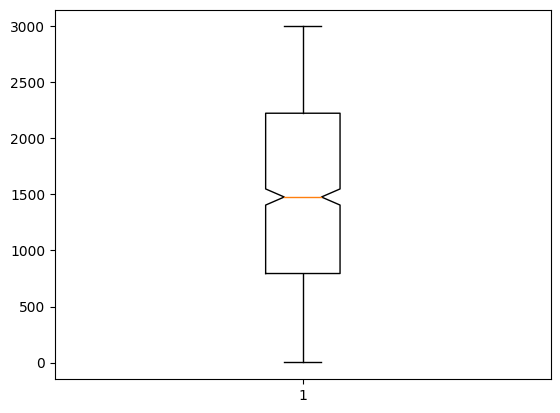

In [68]:
#create a box plot to check for outliers
#looks like we look at where the line is and pick a number below that to remove those integars
plt.boxplot(df.visit, notch=True)

In [69]:
#get rid of any outliers

In [110]:
df1 = df[(df['visit'] <= 2900) & (df['visit'] >= 100)] 

In [111]:
print("The new size of the data is - {}".format(*df1.shape))

The new size of the data is - 923


In [115]:
from flask import flash
from mysqlconnection import connectToMySQL
import MySQLdb
import sqlite3

In [113]:
#attempted to connect to MYSQL like how I do in vscode with python  but this seemed to fail. I still want to keep the code
#so that I can try this again in the future
class Info:
    db = "week_6"

    def __init__(self, data):
        self.id = data['id']
        self.name=data['name']
        self.address=data['address']
        self.city=data['city']
        self.state=data['state']
        self.zip = data['zip']
        self.phone = data['phone']
    
    @classmethod
    def save(cls, data):
        query = 'INSERT INTO user (name, address, city, state, zip, phone) VALUES (%(name)s,%(address)s,%(city)s,%(state)s,%(zip)s,%(phone)s);'
        return connectToMySQL(cls.db).query_db(query, data)

In [114]:
#part of failed code
%sql

INSERT INTO user(name, address, city, state, zip, phone)
VALUES("abc", "falcon", "seatte", "WA", "98003", "1234567890")

SyntaxError: invalid syntax (601452709.py, line 3)

In [175]:
#create a table with query

query = """
CREATE TABLE people
(name VARCHAR(20), address VARCHAR(20), city VARCHAR(20), state VARCHAR(20), zip VARCHAR(5), phone TEXT
);"""

In [176]:
#connect to sqlite
con = sqlite3.connect("mydata.sqlite")

In [177]:
#excecuting the query to create a new table
con.execute(query)

In [178]:
#saving
con.commit()

In [179]:
#data to insert into new table
data = [("Eric", "36565 31st ave S", "Federal Way", "Wa", 98003, 5551234567), 
        ("Suzy", "789 Roehampton St.", "Farmington", "MI", 48331, 5557392830),
        ("James", "447 Ketch Harbour St.", "Allentown", "PA", 18102, 5550283495),
        ("Mike", "399 Manor Road", "Griffin", "GA", 30223, 5550987654),
        ("Roland", "541 Rockland Ave.", "Melbourne", "Fl", 32904, 5553450987),
        ("Bethany", "8090 State St.", "Herndon", "VA", 20170, 5551237895),
        ("Luke", "850 Elm St.", "Wheaton", "IL", 68307, 5559834672),
        ("Emily", "44 Roehampton Street", "Hoffman Estates", "IL", 60169, 5559384756),
        ("Eugene", "73 Smith Store Drive", "New City", "NY", 10956, 5559384756),
        ("Ivonne", "348 Briarwood Street", "Raeford", "NC", 28376, 5555437895),
       ]

In [180]:
#new query to insert data
stmt = "INSERT INTO people VALUES (?,?,?,?,?,?)"

In [181]:
#running code to insert data into table
con.executemany(stmt,data)

In [182]:
#save
con.commit()

In [183]:
#variable with a query to pull all data from table
cursor = con.execute("SELECT * FROM people")

In [184]:

rows = cursor.fetchall()

In [185]:
#running code to print all data from tables!
rows

[('Eric', '36565 31st ave S', 'Federal Way', 'Wa', '98003', '5551234567'),
 ('Suzy', '789 Roehampton St.', 'Farmington', 'MI', '48331', '5557392830'),
 ('James', '447 Ketch Harbour St.', 'Allentown', 'PA', '18102', '5550283495'),
 ('Mike', '399 Manor Road', 'Griffin', 'GA', '30223', '5550987654'),
 ('Roland', '541 Rockland Ave.', 'Melbourne', 'Fl', '32904', '5553450987'),
 ('Bethany', '8090 State St.', 'Herndon', 'VA', '20170', '5551237895'),
 ('Luke', '850 Elm St.', 'Wheaton', 'IL', '68307', '5559834672'),
 ('Emily',
  '44 Roehampton Street',
  'Hoffman Estates',
  'IL',
  '60169',
  '5559384756'),
 ('Eugene', '73 Smith Store Drive', 'New City', 'NY', '10956', '5559384756'),
 ('Ivonne', '348 Briarwood Street', 'Raeford', 'NC', '28376', '5555437895')]